In [1]:
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 


In [2]:
from tensorflow.examples.tutorials.mnist import input_data 
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True) 


W0712 18:27:34.122272 139848465762112 deprecation.py:323] From <ipython-input-2-7f8360d25f5e>:2: read_data_sets (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
W0712 18:27:34.143025 139848465762112 deprecation.py:323] From /home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:260: maybe_download (from tensorflow.contrib.learn.python.learn.datasets.base) is deprecated and will be removed in a future version.
Instructions for updating:
Please write your own downloading logic.
W0712 18:27:34.160258 139848465762112 deprecation.py:323] From /home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/base.py:252: _internal_retry.<locals>.wrap.<locals>.wrapped_fn (from tensorflow.contrib.learn.python.learn.datasets.b

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz


W0712 18:27:42.384568 139848465762112 deprecation.py:323] From /home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:267: extract_labels (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.data to implement this functionality.
W0712 18:27:42.411237 139848465762112 deprecation.py:323] From /home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:110: dense_to_one_hot (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use tf.one_hot on tensors.


Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz


W0712 18:27:47.873521 139848465762112 deprecation.py:323] From /home/rohitbhalerao/anaconda3/lib/python3.7/site-packages/tensorflow/contrib/learn/python/learn/datasets/mnist.py:290: DataSet.__init__ (from tensorflow.contrib.learn.python.learn.datasets.mnist) is deprecated and will be removed in a future version.
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Shape of feature matrix: (55000, 784)
Shape of target matrix: (55000, 10)
One-hot encoding for 1st observation:
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


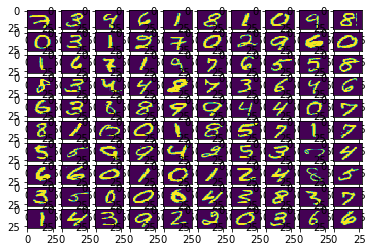

In [3]:
print("Shape of feature matrix:", mnist.train.images.shape) 
print("Shape of target matrix:", mnist.train.labels.shape) 
print("One-hot encoding for 1st observation:\n", mnist.train.labels[0]) 

# visualize data by plotting images 
fig,ax = plt.subplots(10,10) 
k = 0
for i in range(10): 
	for j in range(10): 
		ax[i][j].imshow(mnist.train.images[k].reshape(28,28), aspect='auto') 
		k += 1
plt.show() 


In [4]:
# number of features 
num_features = 784
# number of target labels 
num_labels = 10
# learning rate (alpha) 
learning_rate = 0.05
# batch size 
batch_size = 128
# number of epochs 
num_steps = 5001

# input data 
train_dataset = mnist.train.images 
train_labels = mnist.train.labels 
test_dataset = mnist.test.images 
test_labels = mnist.test.labels 
valid_dataset = mnist.validation.images 
valid_labels = mnist.validation.labels 

# initialize a tensorflow graph 
graph = tf.Graph() 

with graph.as_default(): 
	""" 
	defining all the nodes 
	"""

	# Inputs 
	tf_train_dataset = tf.placeholder(tf.float32, shape=(batch_size, num_features)) 
	tf_train_labels = tf.placeholder(tf.float32, shape=(batch_size, num_labels)) 
	tf_valid_dataset = tf.constant(valid_dataset) 
	tf_test_dataset = tf.constant(test_dataset) 

	# Variables. 
	weights = tf.Variable(tf.truncated_normal([num_features, num_labels])) 
	biases = tf.Variable(tf.zeros([num_labels])) 

	# Training computation. 
	logits = tf.matmul(tf_train_dataset, weights) + biases 
	loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits( 
						labels=tf_train_labels, logits=logits)) 

	# Optimizer. 
	optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(loss) 

	# Predictions for the training, validation, and test data. 
	train_prediction = tf.nn.softmax(logits) 
	valid_prediction = tf.nn.softmax(tf.matmul(tf_valid_dataset, weights) + biases) 
	test_prediction = tf.nn.softmax(tf.matmul(tf_test_dataset, weights) + biases) 


W0712 18:28:25.662237 139848465762112 deprecation.py:323] From <ipython-input-4-b37e01c867ce>:41: softmax_cross_entropy_with_logits (from tensorflow.python.ops.nn_ops) is deprecated and will be removed in a future version.
Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [5]:
# utility function to calculate accuracy 
def accuracy(predictions, labels): 
	correctly_predicted = np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) 
	accu = (100.0 * correctly_predicted) / predictions.shape[0] 
	return accu 

with tf.Session(graph=graph) as session: 
	# initialize weights and biases 
	tf.global_variables_initializer().run() 
	print("Initialized") 

	for step in range(num_steps): 
		# pick a randomized offset 
		offset = np.random.randint(0, train_labels.shape[0] - batch_size - 1) 

		# Generate a minibatch. 
		batch_data = train_dataset[offset:(offset + batch_size), :] 
		batch_labels = train_labels[offset:(offset + batch_size), :] 

		# Prepare the feed dict 
		feed_dict = {tf_train_dataset : batch_data, 
					tf_train_labels : batch_labels} 

		# run one step of computation 
		_, l, predictions = session.run([optimizer, loss, train_prediction], 
										feed_dict=feed_dict) 

		if (step % 500 == 0): 
			print("Minibatch loss at step {0}: {1}".format(step, l)) 
			print("Minibatch accuracy: {:.1f}%".format( 
				accuracy(predictions, batch_labels))) 
			print("Validation accuracy: {:.1f}%".format( 
				accuracy(valid_prediction.eval(), valid_labels))) 

	print("\nTest accuracy: {:.1f}%".format( 
		accuracy(test_prediction.eval(), test_labels))) 


Initialized
Minibatch loss at step 0: 13.627636909484863
Minibatch accuracy: 10.2%
Validation accuracy: 10.2%
Minibatch loss at step 500: 1.06857168674469
Minibatch accuracy: 76.6%
Validation accuracy: 67.3%
Minibatch loss at step 1000: 1.0365982055664062
Minibatch accuracy: 81.2%
Validation accuracy: 75.8%
Minibatch loss at step 1500: 1.1087632179260254
Minibatch accuracy: 76.6%
Validation accuracy: 79.5%
Minibatch loss at step 2000: 0.9853297472000122
Minibatch accuracy: 75.0%
Validation accuracy: 81.7%
Minibatch loss at step 2500: 0.7544634342193604
Minibatch accuracy: 82.8%
Validation accuracy: 83.3%
Minibatch loss at step 3000: 0.8103647232055664
Minibatch accuracy: 86.7%
Validation accuracy: 84.2%
Minibatch loss at step 3500: 0.6177011132240295
Minibatch accuracy: 84.4%
Validation accuracy: 85.0%
Minibatch loss at step 4000: 0.6181390285491943
Minibatch accuracy: 89.1%
Validation accuracy: 85.6%
Minibatch loss at step 4500: 0.7830109596252441
Minibatch accuracy: 81.2%
Validation 